## Impact of Scalers
Comparing the effect of various scalers on the dataset (assuming with outliers)

In [11]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

from sklearn.datasets import fetch_california_housing

In [29]:
# import dataset
df_audio = pd.read_csv("all_features.csv", index_col = 0).drop(['target', 'id'], axis = 1).fillna(0)
df_audio.describe()

,chroma 0 mean,chroma 0 std,chroma 1 mean,chroma 1 std,chroma 2 mean,chroma 2 std,chroma 3 mean,chroma 3 std,chroma 4 mean,chroma 4 std,...,band_discontinuity_amplitudes.mean,band_discontinuity_amplitudes.stdev,band_discontinuity_amplitudes.skew,band_clicks_instances,band_clicks_starts.mean,band_clicks_starts.stdev,band_clicks_starts.skew,band_clicks_durations.mean,band_clicks_durations.stdev,band_clicks_durations.skew
count,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,...,2073.000000,2073.000000,2073.000000,2073.0,2073.0,2073.0,2073.0,2073.0,2073.0,2073.0
mean,0.262098,0.261939,0.263839,0.259772,0.258560,0.263144,0.278356,0.283789,0.274692,0.269247,...,0.000947,0.000353,1.163065,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.043021,0.039475,0.038453,0.040393,0.042919,0.044011,0.046592,0.049395,0.044113,0.044062,...,0.003347,0.003024,16.656119,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.057275,0.084539,0.066501,0.060173,0.039023,0.059576,0.036366,0.056006,0.056022,0.050613,...,0.000000,0.000000,-1.794639,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.234699,0.236308,0.241029,0.235723,0.231305,0.235139,0.250700,0.253203,0.247654,0.241667,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.259401,0.260821,0.263791,0.258942,0.257597,0.260100,0.278015,0.280652,0.276044,0.270590,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.286029,0.285040,0.287363,0.284843,0.286737,0.290164,0.304822,0.311824,0.302185,0.299942,...,0.001762,0.000145,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.517946,0.443696,0.441107,0.441698,0.406540,0.497528,0.610958,0.440034,0.493273,0.436775,...,0.135944,0.095201,402.231293,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
# determine rows with most outliers
# df_audio[(np.abs(stats.zscore(df_audio)) < 2).all(axis=1)]

numeric_cols = df_audio.select_dtypes(include=[np.number]).columns
df_audio[numeric_cols].apply(stats.zscore)

df_audio.describe()

c:\users\rramn\appdata\local\programs\python\python38-32\lib\site-packages\scipy\stats\stats.py:2419: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


,chroma 0 mean,chroma 0 std,chroma 1 mean,chroma 1 std,chroma 2 mean,chroma 2 std,chroma 3 mean,chroma 3 std,chroma 4 mean,chroma 4 std,...,band_discontinuity_amplitudes.mean_zscore_zscore_zscore,band_discontinuity_amplitudes.stdev_zscore_zscore_zscore,band_discontinuity_amplitudes.skew_zscore_zscore_zscore,band_clicks_instances_zscore_zscore_zscore,band_clicks_starts.mean_zscore_zscore_zscore,band_clicks_starts.stdev_zscore_zscore_zscore,band_clicks_starts.skew_zscore_zscore_zscore,band_clicks_durations.mean_zscore_zscore_zscore,band_clicks_durations.stdev_zscore_zscore_zscore,band_clicks_durations.skew_zscore_zscore_zscore
count,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,...,2073.000000,2073.000000,2073.000000,2073.0,2073.0,2073.0,2073.0,2073.0,2073.0,2073.0
mean,0.262098,0.261939,0.263839,0.259772,0.258560,0.263144,0.278356,0.283789,0.274692,0.269247,...,0.000947,0.000353,1.163065,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.043021,0.039475,0.038453,0.040393,0.042919,0.044011,0.046592,0.049395,0.044113,0.044062,...,0.003347,0.003024,16.656119,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.057275,0.084539,0.066501,0.060173,0.039023,0.059576,0.036366,0.056006,0.056022,0.050613,...,0.000000,0.000000,-1.794639,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.234699,0.236308,0.241029,0.235723,0.231305,0.235139,0.250700,0.253203,0.247654,0.241667,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.259401,0.260821,0.263791,0.258942,0.257597,0.260100,0.278015,0.280652,0.276044,0.270590,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.286029,0.285040,0.287363,0.284843,0.286737,0.290164,0.304822,0.311824,0.302185,0.299942,...,0.001762,0.000145,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.517946,0.443696,0.441107,0.441698,0.406540,0.497528,0.610958,0.440034,0.493273,0.436775,...,0.135944,0.095201,402.231293,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
dataset = fetch_california_housing()
X_full, y_full = dataset.data, dataset.target

# Take only 2 features to make visualization easier
# Feature of 0 has a long tail distribution.
# Feature 5 has a few but very large outliers.

X = X_full[:, [0, 5]]

In [3]:
distributions = [
    ('Unscaled data', X),
    ('Data after standard scaling',
        StandardScaler().fit_transform(X)),
    ('Data after min-max scaling',
        MinMaxScaler().fit_transform(X)),
    ('Data after max-abs scaling',
        MaxAbsScaler().fit_transform(X)),
    ('Data after robust scaling',
        RobustScaler(quantile_range=(25, 75)).fit_transform(X)),
    ('Data after power transformation (Yeo-Johnson)',
     PowerTransformer(method='yeo-johnson').fit_transform(X)),
    ('Data after power transformation (Box-Cox)',
     PowerTransformer(method='box-cox').fit_transform(X)),
    ('Data after quantile transformation (gaussian pdf)',
        QuantileTransformer(output_distribution='normal')
        .fit_transform(X)),
    ('Data after quantile transformation (uniform pdf)',
        QuantileTransformer(output_distribution='uniform')
        .fit_transform(X)),
    ('Data after sample-wise L2 normalizing',
        Normalizer().fit_transform(X)),
]

In [4]:
# scale the output between 0 and 1 for the colorbar
y = minmax_scale(y_full)

# plasma does not exist in matplotlib < 1.5
cmap = getattr(cm, 'plasma_r', cm.hot_r)

def create_axes(title, figsize=(16, 6)):
    fig = plt.figure(figsize=figsize)
    fig.suptitle(title)

    # define the axis for the first plot
    left, width = 0.1, 0.22
    bottom, height = 0.1, 0.7
    bottom_h = height + 0.15
    left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.1]
    rect_histy = [left_h, bottom, 0.05, height]

    ax_scatter = plt.axes(rect_scatter)
    ax_histx = plt.axes(rect_histx)
    ax_histy = plt.axes(rect_histy)

    # define the axis for the zoomed-in plot
    left = width + left + 0.2
    left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.1]
    rect_histy = [left_h, bottom, 0.05, height]

    ax_scatter_zoom = plt.axes(rect_scatter)
    ax_histx_zoom = plt.axes(rect_histx)
    ax_histy_zoom = plt.axes(rect_histy)

    # define the axis for the colorbar
    left, width = width + left + 0.13, 0.01

    rect_colorbar = [left, bottom, width, height]
    ax_colorbar = plt.axes(rect_colorbar)

    return ((ax_scatter, ax_histy, ax_histx),
            (ax_scatter_zoom, ax_histy_zoom, ax_histx_zoom),
            ax_colorbar)

In [5]:
def plot_distribution(axes, X, y, hist_nbins=50, title="",
                      x0_label="", x1_label=""):
    ax, hist_X1, hist_X0 = axes

    ax.set_title(title)
    ax.set_xlabel(x0_label)
    ax.set_ylabel(x1_label)

    # The scatter plot
    colors = cmap(y)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.5, marker='o', s=5, lw=0, c=colors)

    # Removing the top and the right spine for aesthetics
    # make nice axis layout
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))

    # Histogram for axis X1 (feature 5)
    hist_X1.set_ylim(ax.get_ylim())
    hist_X1.hist(X[:, 1], bins=hist_nbins, orientation='horizontal',
                 color='grey', ec='grey')
    hist_X1.axis('off')

    # Histogram for axis X0 (feature 0)
    hist_X0.set_xlim(ax.get_xlim())
    hist_X0.hist(X[:, 0], bins=hist_nbins, orientation='vertical',
                 color='grey', ec='grey')
    hist_X0.axis('off')

In [7]:
def make_plot(item_idx):
    title, X = distributions[item_idx]
    ax_zoom_out, ax_zoom_in, ax_colorbar = create_axes(title)
    axarr = (ax_zoom_out, ax_zoom_in)
    plot_distribution(axarr[0], X, y, hist_nbins=200,
                      x0_label="Median Income",
                      x1_label="Number of households",
                      title="Full data")

    # zoom-in
    zoom_in_percentile_range = (0, 99)
    cutoffs_X0 = np.percentile(X[:, 0], zoom_in_percentile_range)
    cutoffs_X1 = np.percentile(X[:, 1], zoom_in_percentile_range)

    non_outliers_mask = (
        np.all(X > [cutoffs_X0[0], cutoffs_X1[0]], axis=1) &
        np.all(X < [cutoffs_X0[1], cutoffs_X1[1]], axis=1))
    plot_distribution(axarr[1], X[non_outliers_mask], y[non_outliers_mask],
                      hist_nbins=50,
                      x0_label="Median Income",
                      x1_label="Number of households",
                      title="Zoom-in")

    norm = mpl.colors.Normalize(y_full.min(), y_full.max())
    mpl.colorbar.ColorbarBase(ax_colorbar, cmap=cmap,
                              norm=norm, orientation='vertical',
                              label='Color mapping for values of y')

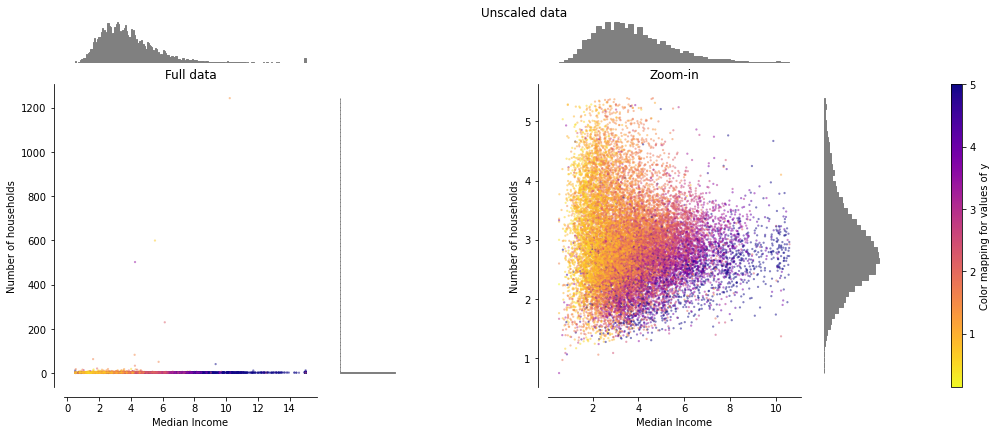

In [8]:
make_plot(0)